In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import requests 
from urllib.parse import urlencode 
import datetime
%matplotlib inline 
from urllib.parse import urlencode 
from scipy import stats
from scipy.stats import bootstrap

In [2]:
# Задание 1
# Retention – один из самых важных показателей в компании.
# Ваша задача – написать функцию, которая будет считать retention игроков (по дням от даты регистрации игрока). 

In [3]:
problem1_reg_data = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-a-krivosheina/shared/problem1-reg_data.csv', sep = ';')
problem1_auth_data = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-a-krivosheina/shared/problem1-auth_data.csv', sep = ';')

In [4]:
# Преобразуем даты в формат дат, оставим их на всякий случай, создадим столбцы с датой без времени и объединим два ДФ

In [5]:
problem1_reg_data['reg_ts']= pd.to_datetime(problem1_reg_data.reg_ts, unit= 's')
problem1_auth_data['auth_ts']= pd.to_datetime(problem1_auth_data.auth_ts, unit= 's')

In [6]:
problem1_reg_data['reg_day']= problem1_reg_data.reg_ts.dt.date
problem1_auth_data['auth_day']= problem1_auth_data.auth_ts.dt.date

In [7]:
data_ex_1 = problem1_auth_data.merge(problem1_reg_data, how = "left", on = 'uid' )

In [8]:
data_ex_1 = data_ex_1[['uid', 'reg_day', 'auth_day', 'reg_ts', 'auth_ts']]

In [9]:
data_ex_1['n_day'] = (data_ex_1['auth_day'] - data_ex_1['reg_day']).dt.days

In [10]:
data_ex_1

,uid,reg_day,auth_day,reg_ts,auth_ts,n_day
0,1,1998-11-18,1998-11-18,1998-11-18 09:43:43,1998-11-18 09:43:43,0
1,2,1999-07-22,1999-07-22,1999-07-22 22:38:09,1999-07-22 22:38:09,0
2,2,1999-07-22,1999-07-25,1999-07-22 22:38:09,1999-07-25 16:46:46,3
3,2,1999-07-22,1999-07-31,1999-07-22 22:38:09,1999-07-31 03:50:15,9
4,2,1999-07-22,1999-08-05,1999-07-22 22:38:09,1999-08-05 17:49:39,14
...,...,...,...,...,...,...
9601008,1110618,2020-09-23,2020-09-23,2020-09-23 15:13:54,2020-09-23 15:13:54,0
9601009,1110619,2020-09-23,2020-09-23,2020-09-23 15:14:46,2020-09-23 15:14:46,0
9601010,1110620,2020-09-23,2020-09-23,2020-09-23 15:15:39,2020-09-23 15:15:39,0
9601011,1110621,2020-09-23,2020-09-23,2020-09-23 15:16:31,2020-09-23 15:16:31,0


In [11]:
data_ex_1.dtypes

uid                  int64
reg_day             object
auth_day            object
reg_ts      datetime64[ns]
auth_ts     datetime64[ns]
n_day                int64
dtype: object

In [12]:
data_ex_1.reg_day.min()

datetime.date(1998, 11, 18)

In [13]:
# Чтобы выбрать для каких пользователей мы считаем retention, необходимо указать значение в переменной enter_day_reg

In [14]:
enter_day_reg = datetime.date(2020, 9, 10)

# ВВОДИМ НУЖНУЮ ДАТУ РЕГИСТРАЦИИ, ЧТОБЫ ВЫБРАТЬ ПОЛЬЗОВАТЕЛЕЙ 
# ЕСЛИ ПОСТАВИТЬ В РАСЧЕТЕ sample_enter_day_reg  ВМЕСТО ==    > ИЛИ < , ТО СООТВЕТСВЕННО БОЛЬШЕ ИЛИ МЕНЬШЕ УКАЗАННОЙ ДАТЫ РЕГИСТРАЦИИ.
# ДЛЯ ВЫВОДА ПО ВСЕМУ ДФ НЕОБХОДИМО ПОСТАВИТЬ ДАТУ (1998, 11, 17).

In [15]:
sample_enter_day_reg = data_ex_1.loc[lambda problem1_reg_data: problem1_reg_data['reg_day']== enter_day_reg]

In [16]:
data_delta_part = data_ex_1.n_day.max() + 1
data_delta_list_part = list(range(0,data_delta_part))

def calc_retention_part(sample_enter_day_reg, data_delta_list_part):
    retention_part = []
    all_cust_part = sample_enter_day_reg.uid.nunique()

    for day in data_delta_list_part:
        auth_day_cust_part = sample_enter_day_reg.loc[lambda sample_enter_day_reg: sample_enter_day_reg['n_day'] == day].uid.nunique()
        
        
        if all_cust_part !=0:
            retention_calc_part = round(auth_day_cust_part/all_cust_part*100, 2)
            
        else:
            retention_calc_part = 0
            
        retention_part.append(retention_calc_part)
        
    return retention_part

In [17]:
lst_retention_part = calc_retention_part(sample_enter_day_reg, data_delta_list_part)

In [18]:
data_retention_part = []
data_retention_part.append(data_delta_list_part)
data_retention_part.append(lst_retention_part)

In [19]:
data_retention_part_df = pd.DataFrame(data_retention_part).transpose ()
data_retention_part_df.columns =['n_day', 'retention']
data_retention_part_df['n_day'] =  data_retention_part_df.n_day.astype('int64')

In [20]:
data_retention_part_df

,n_day,retention
0,0,100.00
1,1,2.05
2,2,4.29
3,3,4.79
4,4,4.23
...,...,...
7725,7725,0.00
7726,7726,0.00
7727,7727,0.00
7728,7728,0.00


In [21]:
# Задание 2
# Имеются результаты A/B теста, в котором двум группам пользователей предлагались различные наборы акционных предложений.
# Известно, что ARPU в тестовой группе выше на 5%, чем в контрольной.
# При этом в контрольной группе 1928 игроков из 202103 оказались платящими, а в тестовой – 1805 из 202667.

# Какой набор предложений можно считать лучшим? Какие метрики стоит проанализировать для принятия правильного решения и как?

In [22]:
# используем api 
base_url = 'https://cloud-api.yandex.net/v1/disk/public/resources/download?' 
public_key = 'https://disk.yandex.ru/d/SOkIsD5A8xlI7Q' 
 
# получаем url 
final_url = base_url + urlencode(dict(public_key=public_key)) 
response = requests.get(final_url) 
download_url = response.json()['href'] 
 
# загружаем файл в df 
download_response = requests.get(download_url) 
data_ex_2 = pd.read_csv(download_url, sep = ';') 

In [23]:
data_ex_2.groupby('testgroup', as_index = False) \
         .agg({'revenue':'count'})

,testgroup,revenue
0,a,202103
1,b,202667


In [24]:
# Размер тестровой и контрольной группы практически равны (тестровая больше на 0,3%)

In [25]:
data_ex_2.groupby('testgroup', as_index = False) \
         .agg({'revenue':'sum'})

,testgroup,revenue
0,a,5136189
1,b,5421603


In [26]:
 # Суммарная прибыль от пользователей тестовой группы больше на 5 %

In [27]:
data_ex_2_not_0 = data_ex_2.query('revenue > 0')

In [28]:
data_ex_2_not_0.groupby('testgroup', as_index = False) \
               .agg({'revenue':'count'})

,testgroup,revenue
0,a,1928
1,b,1805


In [29]:
# платящих пользователей в контрольной группе a, больше на 6% , чем в тестовой группе b 

In [30]:
cr_a_perc = data_ex_2.query('testgroup == "a" & revenue > 0').testgroup.count()/data_ex_2.query('testgroup == "a"').testgroup.count()*100
cr_a_perc.round(2)
# CR в контрольной группе 0.95 %

0.95

In [31]:
cr_b_perc = data_ex_2.query('testgroup == "b" & revenue > 0').testgroup.count()/data_ex_2.query('testgroup == "b"').testgroup.count()*100
cr_b_perc.round(2)

# CR в тестовой группе 0.89 %

0.89

In [32]:
# То есть в контрольной группе бОльшая доля пользователей воспользовалась акционным предложением (на 0,06 %)

In [33]:
data_ex_2_not_0.groupby('testgroup', as_index = False) \
               .agg({'revenue':'mean'}) \
               .round(0)

,testgroup,revenue
0,a,2664.0
1,b,3004.0


In [34]:
# ARPPU в тестовой группе (b) выше на 11 %, чем в контрольной (a)

In [35]:
sample_a = data_ex_2.query('testgroup == "a" & revenue > 0').revenue # контрольная групп, платящие пользователи

In [36]:
sample_b = data_ex_2.query('testgroup == "b" & revenue > 0').revenue # тестовая группа, платящие пользователи

In [37]:
# чтобы использовать t- тест, необходимо проверить выборки на гомогенность дисперсий и нормальность

In [38]:
stats.levene(sample_a, sample_b, center='mean')

LeveneResult(statistic=445.9869447066088, pvalue=1.3202514573715939e-93)

In [39]:
# p-значение составляет менее 0,05 
# Это ознаяает, что требование гомогенности дисперсий не выполняется, поэтому t- тест использовать не получится

In [40]:
data_ex_2_not_0.groupby('testgroup', as_index = False) \
               .agg({'revenue':np.median}) \
               .round(0)

,testgroup,revenue
0,a,311
1,b,3022


In [41]:
# медианные траты по платящим пользователям в тестовой группе (b) почти в 10 раз выше, чем в контрольной

In [42]:
# Посмотрим как выглядят выборки на графике

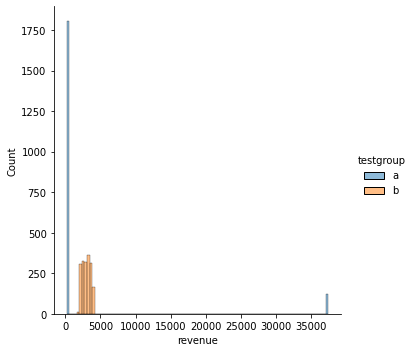

In [43]:
sns.displot(data=data_ex_2_not_0, x="revenue", hue="testgroup")

In [44]:
# контрольная выборка (a) крайне неоднородна

In [45]:
data_ex_2_not_0.query('testgroup == "a" & revenue > 37000').revenue.count() 
# в контрольной выборке 6 % (123 из 1928) составляют траты суммой более 37 000

123

In [46]:
data_ex_2_not_0.query('testgroup == "a" & revenue > 37000').revenue.sum() 
# и при этом составляют 89 % от всех потраченных средств от пользователей контрольной группы (4 590 252 из 5 136 189)

4590252

In [47]:
data_ex_2_not_0.query('testgroup == "a" & revenue < 450').revenue.count() 
# основная же часть контрольной выборки (94%) значений лежит в интервале от 200 до 450

1805

In [48]:
data_ex_2_not_0.query('testgroup == "a" & revenue < 450').revenue.sum() 
# и при этом составляют 11 % от всех потраченных средств от пользователей контрольной группы (545 937 из 5 136 189)

545937

In [49]:
# чтобы оценить статистическую значимость различий в медианах применяем bootstrap

In [50]:
a_df = data_ex_2_not_0.query('testgroup == "a"')
b_df = data_ex_2_not_0.query('testgroup == "b"')

median_diff = []

for i in range(10000):
    sample_data_a = a_df.sample(frac=1, replace=True)
    sample_median_a = sample_data_a.revenue.median()
    
    
    sample_data_b = b_df.sample(frac=1, replace=True)
    sample_median_b = sample_data_b.revenue.median()
    
    
    sample_median_diff = sample_median_a - sample_median_b
    median_diff.append(sample_median_diff)

In [51]:
pd.Series(median_diff).quantile(0.025)

-2761.0

In [52]:
pd.Series(median_diff).quantile(0.975)

-2658.0

In [53]:
# медианы стазначимо отличаются, т.е. экспиримент повлиял на траты пользователей

In [54]:
# Какие выводы можно сделать?

In [55]:
# Если сравнивать две группы пользователей, то для бизнеса удобнее иметь вариант b, потому что все пользователи платят 
# плюс/минус одинаково и потеря одного пользователя не приведет к существенному проседанию общей прибыли. 
# То есть вариант b (тестовая группа) более надежный.

In [56]:
# А чтобы доходы были максимальны необходимо проанализировать клиентов и их предложения с тратами более 37 000
# и попробовать на аналогичных пользователях применить предложения из контрольной группы, а остальным пользователям предлагать
# варианты из тестовой, где средние и медианные траты основной массы пользователей выше.

# Таким образом мы получим и сверхвысокодоходных пользователей, которых будет немного, но которые значимо влияют на 
# общую прибыль, и увеличим прибыль от основной массы базовых пользователей

In [57]:
# Задание 3
# В игре Plants & Gardens каждый месяц проводятся тематические события, ограниченные по времени. В них игроки могут получить 
# уникальные предметы для сада и персонажей, дополнительные монеты или бонусы. 
# Для получения награды требуется пройти ряд уровней за определенное время. 
# С помощью каких метрик можно оценить результаты последнего прошедшего события?

# Предположим, в другом событии мы усложнили механику событий так, что при каждой неудачной попытке выполнения уровня игрок
# будет откатываться на несколько уровней назад. Изменится ли набор метрик оценки результата? Если да, то как?

In [ ]:
# Во время тематического события я бы сняла следующие метрики:
    
# 1.Время прохождения доп уровней (делим на п4 и получаем среднее время одной попытки,  делим на п2 и получаем сколько времени
#   в среднем один игрок пытался получить бонус)
# 2.Количество игроков, которые попытались получить бонус (делим на п3  и получаем долю от активных игроков)
# 3.Количество активных игроков(например, такой расчет 0- игроки, которые загружали игру и провели в ней минимум 10 минут 
#   за последний месяц)
# 4.Количество попыток прохождения доп уровней
# 5.Количество игроков, получивших бонус (делим на п3  и получаем долю от активных игроков)
# 6.Количество удачных и неудачных попыток(делим на п3  и получаем долю от активных игроков)
# 7.Уровень до события (можем посмотреть какого рода игроки принимают участие в событии)
# 8.НОВАЯ МЕТРИКА - Уровень после события (считаем дельту между уровнями до и после тематического события. До эксперимента,
#   вероятно, уровни были либо неизменны либо естественно росли в ходе прохождения игры, после же эксперимента возможны откаты, 
#   которые нужно зафиксировать)

# Так как количество пользователей от месяца к месяцу может меняться, рассматривать чистые цифры по количеству пользователей не 
# следует. Необходимо рассчитывать % от активной пользовательской базы в текущем месяце. Средние же данные по времени 
# прохождения уровня, времени проведенного в игре и др, а также средний уровень игроков и  дельту в уровнях игроков сравнивать 
# вполне уместно.

# Так как раньше пользователи просто не получали доп вещь при неудаче, а теперь лишаются части пройденных уровней, то я бы 
# выделила группу пользователей, которая принимала участие в попытке выиграть бонус по новым правилам, и посмотрела на ее
# показатели за месяц (лучше 2-3 месяца) до события и месяц сразу после. 
# Также можно сравнить показатели по группам, которые принимали участие в прошлых событиях и рассмотреть месяц после него 
# и группу, которая играла по новым условия и месяц после него.

# Показатели:
    
# 1.Average Session Duration — это среднее время сессий за период времени

# 2.Average Transaction Value — средняя стоимость покупок за период, средний чек
#   (ATV = Общая сумма покупок / количество покупок)

# 3. Stickiness rate - регулярность использования приложения в течение месяца. 
#    Stickiness rate = DAU / MAU 
#    (DAU/WAU/MAU - количество уникальных пользователей в день/в  неделю/ в месяц). 
#    Просто DAU/WAU/MAU смотреть не имеет большого смысла, тк группы по объему могут отличаться.
 
# 4. Retention rate - процент клиентов, которые возвращаются в приложение.
#    Day N Retention измеряет, сколько пользователей возвращается на N-й день после события.

# 5. Churn rate - отток пользователей.
#    Retention Rate наоборот: 100% − Retention = Churn Rate.

# 6. ARPU/ARPPU средний доход с одного пользователя/платящего пользователя.
#    ARPU = Выручка с когорты за всё время / количество пользователей в когорте.
#    ARPPU = Выручка приложения / количество уникальных платящих пользователей.

# 7. Виральность - характеризует степень распространения игры, а также готовность и желание пользователей привлекать своих знакомых и друзей
#    для совместных развлечений.

# Часть показателей могла ухудшиться, потому как пользователи могли разочароваться или обидеться за полученный регресс.
# Либо наоборот, пользователи стали активнее играть и покупать, чтобы нивелировать откат. 
# Также при сравнении с другими месяцами и группами следует учесть сезонность (применит коэффициент, например, чтобы стандартные
# сезонные изменения не влияли на результат сравнения), ведь показатели не однородны в течение года и меняются 
# по ественственным причинам  при прочих равных условиях.
